## Propensity Matching

In [1]:
import pandas as pd

In [2]:
excel_file_path = 'Annual Performance.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [3]:
# Display the keys (worksheet names) in the dictionary
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['Cover', 'Notes', 'Contents', 'Important Notice', 'Table 1', 'Table 2a', 'Table 2b', 'Table 3a', 'Table 3b', 'Table 4', 'Table 5', 'Table 6', 'Table 7', 'Table 8', 'Table 9', 'Table 10', 'Table 11', 'Table 12', 'Table 13', 'Revisions', 'Explanatory Notes', 'Table 14']


In [4]:
member_age = all_dfs['Table 12']

member_value = all_dfs['Table 13']

saa = all_dfs['Table 9']

In [5]:
# Extract the header row (Row 1)
new_columns_row = member_age.iloc[4]

# Drop rows 0, 1, 3
member_age = member_age.drop([0, 1, 2, 3, 4, 5, 6])

# Set the header row as the column names
member_age.columns = new_columns_row

# Reset the index to the default numeric index
member_age.reset_index(drop=True, inplace=True)

In [6]:
# Extract the header row (Row 1)
new_columns_row = member_value.iloc[4]

# Drop rows 0, 1, 3
member_value = member_value.drop([0, 1, 2, 3, 4, 5, 6])

# Set the header row as the column names
member_value.columns = new_columns_row

# Reset the index to the default numeric index
member_value.reset_index(drop=True, inplace=True)

In [7]:
# Extract the header row (Row 1)
new_columns_row = saa.iloc[4]

# Drop rows 0, 1, 3
saa = saa.drop([0, 1, 2, 3, 4, 5, 6])

# Set the header row as the column names
saa.columns = new_columns_row

# Reset the index to the default numeric index
saa.reset_index(drop=True, inplace=True)

Columns

In [8]:
# Columns to be used from member age
member_age_columns = [
    'Period',
    'Fund name',
    'ABN',
    '<25%',
    '25 to 34%',
    '35 to 44%',
    '45 to 49%',
    '50 to 54%',
    '55 to 59%',
    '60 to 64%',
    '65 to 69%',
    '70 to 74%',
    '75 to 84%',
    '85+%'
]

# Columns to be used from member balance
member_value_columns = [
    'Period',
    'Fund name',
    'ABN',
    '<$1,000%',
    '$1,000 to $24,999%',
    '$25,000 to $49,000%',
    '$50,000 to $99,999%',
    '$100,000 to $199,999%',
    '$200,000 to $499,999%',
    '$500,000 to $999,999%',
    '$1,000,000+%'
]

# Columns to be used from saa (Strategic Asset Allocation)
saa_columns = [
    'Period',
    'Fund name',
    'ABN',
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income',
    'Proportion of investments in equity',
    'Proportion of investments in property',
    'Proportion of investments in infrastructure',
    'Proportion of investments in commodities',
    'Proportion of investments in other'
]


In [9]:
# Select only the columns you need from each DataFrame
df_member_age_filtered = member_age[member_age_columns]
df_member_value_filtered = member_value[member_value_columns]
df_saa_filtered = saa[saa_columns]

# Merge the DataFrames based on 'Period', 'ABN', and 'Fund name'
merged_df1 = pd.merge(df_member_age_filtered, df_member_value_filtered, on=['Period', 'ABN', 'Fund name'], how='inner')
propensity = pd.merge(merged_df1, df_saa_filtered, on=['Period', 'ABN', 'Fund name'], how='inner')

# Drop any rows with missing values
#propensity.dropna(inplace=True)


In [10]:
# Replace '*' and blank values with 0
propensity.replace(['*', ''], 0, inplace=True)

# Replace NaN values with 0
propensity.fillna(0, inplace=True)

In [11]:
propensity

4,Period,Fund name,ABN,<25%,25 to 34%,35 to 44%,45 to 49%,50 to 54%,55 to 59%,60 to 64%,...,"$200,000 to $499,999%","$500,000 to $999,999%","$1,000,000+%",Proportion of investments in cash,Proportion of investments in fixed income,Proportion of investments in equity,Proportion of investments in property,Proportion of investments in infrastructure,Proportion of investments in commodities,Proportion of investments in other
0,2022-06-30,Alcoa of Australia Retirement Plan,80928800255,0.00,0.02,0.08,0.09,0.15,0.23,0.22,...,0.36,0.25,0.06,0.15,0.27,0.43,0.08,0.06,0.0,0.01
1,2022-06-30,AMG Super,30099320583,0.00,0.06,0.20,0.10,0.10,0.11,0.15,...,0.10,0.02,0.01,0.16,0.14,0.63,0.05,0.01,0.0,0.00
2,2022-06-30,AMP Super Fund,78421957449,0.01,0.05,0.19,0.14,0.16,0.15,0.12,...,0.08,0.01,0.00,0.08,0.19,0.58,0.08,0.01,0.0,0.06
3,2022-06-30,ANZ Australian Staff Superannuation Scheme,83810127567,0.00,0.05,0.21,0.14,0.17,0.18,0.13,...,0.23,0.08,0.02,0.10,0.14,0.61,0.09,0.03,0.0,0.03
4,2022-06-30,Aracon Superannuation Fund,40586548205,0.00,0.01,0.04,0.04,0.06,0.05,0.13,...,0.19,0.10,0.03,0.09,0.27,0.42,0.02,0.02,0.0,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2015-06-30,Wealth Personal Superannuation and Pension Fund,92381911598,0.02,0.03,0.07,0.06,0.08,0.14,0.22,...,0.13,0.04,0.01,0.20,0.17,0.53,0.06,0.01,0.0,0.02
1423,2015-06-30,Westpac Mastertrust - Superannuation Division,81236903448,0.02,0.16,0.25,0.13,0.14,0.12,0.08,...,0.01,0.00,0.00,0.09,0.18,0.57,0.07,0.00,0.0,0.10
1424,2015-06-30,Westpac Personal Superannuation Fund,36369876939,0.00,0.00,0.06,0.14,0.21,0.24,0.20,...,0.01,0.00,0.00,0.16,0.16,0.52,0.05,0.00,0.0,0.11
1425,2015-06-30,Worsley Alumina Superannuation Fund,51469547458,0.01,0.10,0.24,0.18,0.19,0.19,0.08,...,0.25,0.05,0.00,0.12,0.23,0.52,0.07,0.06,0.0,0.00


Importing Merger List

In [12]:
excel_file_path = 'Merged SF Annual Data.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [13]:
# Display the keys (worksheet names) in the dictionary
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['Annual', 'Quarterly', 'Merger List', 'Fail']


In [14]:
Annual = all_dfs['Annual']

In [15]:
# Sort the dataframe by 'Merger' column in descending order
Annual.sort_values(by='Merger', ascending=False, inplace=True)

# Drop duplicate rows based on 'Period', 'Fund Name', and 'ABN'
Annual.drop_duplicates(subset=['Period', 'Fund name', 'ABN'], keep='first', inplace=True)

# Reset the index
Annual.reset_index(drop=True, inplace=True)

In [16]:
Annual

,Period,Fund name,ABN,Merger,Merged,Acquirer
0,2022-06-30,Australian Retirement Trust,60905115063,1,0,NaN
1,2021-06-30,equipsuper,33813823017,1,0,NaN
2,2019-06-30,Smart Future Trust,68964712340,1,0,NaN
3,2019-06-30,Russell Investments Master Trust,89384753567,1,0,NaN
4,2011-06-30,Aware Super,53226460365,1,0,NaN
...,...,...,...,...,...,...
745,2009-06-30,Russell Investments Master Trust,89384753567,0,0,NaN
746,2009-06-30,Rio Tinto Staff Superannuation Fund,98438661856,0,0,NaN
747,2009-06-30,Retirement Portfolio Service,61808189263,0,0,NaN
748,2009-06-30,Reserve Bank of Australia Officers Superannuat...,25303030489,0,0,NaN


In [17]:
# Convert the 'Period' columns to datetime if they are not already
propensity['Period'] = pd.to_datetime(propensity['Period'])
Annual['Period'] = pd.to_datetime(Annual['Period'])

# Merge the DataFrames based on 'Period', 'Fund name', and 'ABN'
final_df = pd.merge(propensity, Annual[['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer']], 
                    on=['Period', 'Fund name', 'ABN'], 
                    how='inner')


In [18]:
final_df

,Period,Fund name,ABN,<25%,25 to 34%,35 to 44%,45 to 49%,50 to 54%,55 to 59%,60 to 64%,...,Proportion of investments in cash,Proportion of investments in fixed income,Proportion of investments in equity,Proportion of investments in property,Proportion of investments in infrastructure,Proportion of investments in commodities,Proportion of investments in other,Merger,Merged,Acquirer
0,2022-06-30,Australian Retirement Trust,60905115063,0.01,0.07,0.17,0.11,0.14,0.15,0.14,...,0.11,0.22,0.46,0.08,0.10,0.00,0.03,1,0,NaN
1,2022-06-30,AustralianSuper,65714394898,0.01,0.07,0.17,0.11,0.13,0.15,0.15,...,0.10,0.18,0.51,0.07,0.13,0.00,0.00,1,0,NaN
2,2022-06-30,Aware Super,53226460365,0.00,0.05,0.14,0.11,0.13,0.13,0.15,...,0.07,0.22,0.55,0.09,0.06,0.00,0.01,0,0,NaN
3,2022-06-30,CONSTRUCTION AND BUILDING UNIONS SUPERANNUATIO...,75493363262,0.01,0.10,0.21,0.13,0.15,0.15,0.13,...,0.02,0.22,0.50,0.14,0.13,0.00,0.00,1,0,NaN
4,2022-06-30,equipsuper,33813823017,0.00,0.03,0.12,0.09,0.13,0.17,0.18,...,0.11,0.16,0.57,0.08,0.07,0.00,0.01,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2015-06-30,The Executive Superannuation Fund,60998717367,0.01,0.14,0.28,0.12,0.13,0.12,0.09,...,0.16,0.17,0.59,0.07,0.00,0.00,0.01,0,0,NaN
247,2015-06-30,Toyota Super,58208377062,0.00,0.03,0.21,0.20,0.21,0.20,0.11,...,0.13,0.17,0.58,0.11,0.01,0.00,0.00,0,0,NaN
248,2015-06-30,Victorian Superannuation Fund,85977964496,0.00,0.09,0.20,0.10,0.11,0.14,0.17,...,0.14,0.14,0.64,0.04,0.04,0.00,0.00,0,0,NaN
249,2015-06-30,Virgin Superannuation,88436608094,0.01,0.21,0.41,0.15,0.10,0.07,0.03,...,0.08,0.15,0.66,0.11,0.00,0.00,0.00,0,0,NaN


Saving Spreadsheet

In [84]:
merged_df = pd.merge(propensity, Annual, on=['Period', 'Fund name', 'ABN'], how='left')

merged_df[['Merger', 'Merged', 'Acquirer']] = merged_df[['Merger', 'Merged', 'Acquirer']].fillna(0)


# Show the merged DataFrame
print(merged_df)

         Period                                        Fund name          ABN  \
0    2022-06-30               Alcoa of Australia Retirement Plan  80928800255   
1    2022-06-30                                        AMG Super  30099320583   
2    2022-06-30                                   AMP Super Fund  78421957449   
3    2022-06-30       ANZ Australian Staff Superannuation Scheme  83810127567   
4    2022-06-30                       Aracon Superannuation Fund  40586548205   
...         ...                                              ...          ...   
1422 2015-06-30  Wealth Personal Superannuation and Pension Fund  92381911598   
1423 2015-06-30    Westpac Mastertrust - Superannuation Division  81236903448   
1424 2015-06-30             Westpac Personal Superannuation Fund  36369876939   
1425 2015-06-30              Worsley Alumina Superannuation Fund  51469547458   
1426 2015-06-30                Zurich Master Superannuation Fund  33632838393   

      <25%  25 to 34%  35 t

In [85]:
merged_df.to_excel('Propensity.xlsx', index=False, engine='openpyxl')

Building Metrics for Propensity score

In [19]:
# Count the number of occurrences of 1 in 'Merger' and 'Merged' columns
count_merger = (final_df['Merger'] == 1).sum()
count_merged = (final_df['Merged'] == 1).sum()

# Print the counts
print("Count of 1's in 'Merger' column:", count_merger)
print("Count of 1's in 'Merged' column:", count_merged)

Count of 1's in 'Merger' column: 22
Count of 1's in 'Merged' column: 24


In [20]:
final_df.columns

Index(['Period', 'Fund name', 'ABN', '<25%', '25 to 34%', '35 to 44%',
       '45 to 49%', '50 to 54%', '55 to 59%', '60 to 64%', '65 to 69%',
       '70 to 74%', '75 to 84%', '85+%', '<$1,000%', '$1,000 to $24,999%',
       '$25,000 to $49,000%', '$50,000 to $99,999%', '$100,000 to $199,999%',
       '$200,000 to $499,999%', '$500,000 to $999,999%', '$1,000,000+%',
       'Proportion of investments in cash',
       'Proportion of investments in  fixed income',
       'Proportion of investments in equity',
       'Proportion of investments in property',
       'Proportion of investments in infrastructure',
       'Proportion of investments in commodities',
       'Proportion of investments in other', 'Merger', 'Merged', 'Acquirer'],
      dtype='object')

In [21]:
# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

In [2]:
# Initialize an empty list to store the results
merged_funds_list = []

# Columns to consider for the propensity score
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%', '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%', 'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}


# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period').iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = column_weights.get(col, 1)  # Get the weight from the dictionary, default to 1
           # weighted_diff_sum += weight * (target_firm[col] - acquirer_firm[col]) ** 2  # Using squared differences
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Print or store the information
        print(f"Target Fund: {row['Fund name']}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score}")
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)


NameError: name 'final_df' is not defined

## Propensity Scores - Merger Sample at Period Before Merger

In [22]:
# Initialize an empty list to store the results
merged_funds_list = []

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Print or store the information
        print(f"Target Fund: {row['Fund name']}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score:.3f}")
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)


Target Fund: SPSL Master Trust, Acquirer: LGIAsuper, Propensity Score: 0.954
Target Fund: Australia Post Superannuation Scheme, Acquirer: Australian Retirement Trust, Propensity Score: 0.955
Target Fund: Boc Gases Superannuation Fund, Acquirer: equipsuper, Propensity Score: 0.975
Target Fund: Club Plus Superannuation Scheme, Acquirer: AustralianSuper, Propensity Score: 0.982
Target Fund: Energy Super, Acquirer: LGIAsuper, Propensity Score: 0.972
Target Fund: Intrust Super Fund, Acquirer: HOSTPLUS Superannuation Fund, Propensity Score: 0.986
Target Fund: Labour Union Co-Operative Retirement Fund, Acquirer: AustralianSuper, Propensity Score: 0.980
Target Fund: Media Super, Acquirer: CONSTRUCTION AND BUILDING UNIONS SUPERANNUATION FUND, Propensity Score: 0.973
Target Fund: IAG & NRMA Superannuation Plan, Acquirer: Sunsuper Superannuation Fund, Propensity Score: 0.943
Target Fund: Toyota Super, Acquirer: equipsuper, Propensity Score: 0.977
Target Fund: WA Local Government Superannuation Pl

In [23]:
if target_firm[columns_to_consider].isnull().any() or acquirer_firm[columns_to_consider].isnull().any():
    print(f"Missing data for target fund {row['Fund name']} or acquirer {acquirer_name}.")


In [38]:
print(average_hypothetical_score)

0.9515286116322701


No acquirer found for target fund Quadrant Superannuation Scheme for the period just before the merger.


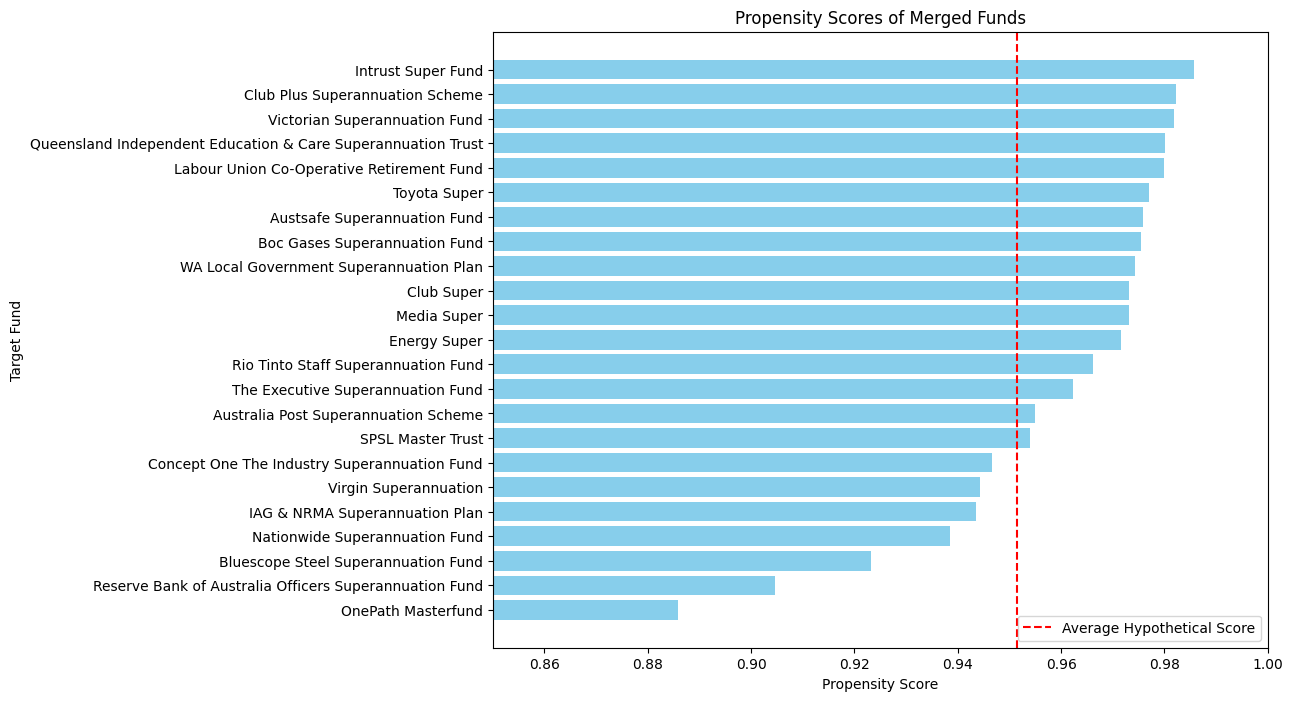

0.9515286116322701


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from scipy.stats import boxcox

# Initialize an empty list to store the results
merged_funds_list = []
hypothetical_scores = []

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Store the information
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Calculate hypothetical propensity scores for every possible merger
for target, acquirer in combinations(final_df['Fund name'].unique(), 2):
    target_firm = final_df[final_df['Fund name'] == target].iloc[-1]
    acquirer_firm = final_df[final_df['Fund name'] == acquirer].iloc[-1]
    
    weighted_diff_sum = sum(abs(target_firm[col] - acquirer_firm[col]) for col in columns_to_consider)
    propensity_score = 1 - (weighted_diff_sum / len(columns_to_consider))
    hypothetical_scores.append(propensity_score)

# Calculate the average hypothetical propensity score
average_hypothetical_score = sum(hypothetical_scores) / len(hypothetical_scores)

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.axvline(x=average_hypothetical_score, color='red', linestyle='--', label='Average Hypothetical Score')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds')
plt.xlim(0.85, 1)  # Since propensity score is between 0 and 1
plt.legend()
# Save the plot as a PDF
plt.savefig('Propensity_Scores_of_Merged_Funds.pdf', format='pdf', bbox_inches='tight')
plt.show()
print(average_hypothetical_score)

In [68]:
fig.savefig('Propensity Scores.pdf', bbox_inches='tight')

## Propensity Scores - Merger Sample: Time-Series

In [46]:
# Initialize an empty dictionary to store the results
merged_funds_dict = {}

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        target_name = row['Fund name']

        # Find the acquirer firm in the periods before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')

        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {target_name} for the periods just before the merger.")
            continue

        # Initialize nested dictionary if target name not present
        if target_name not in merged_funds_dict:
            merged_funds_dict[target_name] = {}

        for i, acquirer_firm in acquirer_firm_df.iterrows():
            # Initialize variables to hold the weighted sum of differences and the sum of weights
            weighted_diff_sum = 0
            weight_sum = 0

            # Calculate the weighted sum of absolute differences
            for col in columns_to_consider:
                weight = 1  # You can change this if you want to give different weights to different metrics
                weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
                weight_sum += weight

            # Calculate the propensity score
            propensity_score = 1 - (weighted_diff_sum / weight_sum)

            # Store the information in nested dictionary
            merged_funds_dict[target_name][acquirer_firm['Period']] = propensity_score

# Convert the nested dictionary to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_dict).transpose()
print(merged_funds_df)


No acquirer found for target fund Quadrant Superannuation Scheme for the periods just before the merger.
                                                    2015-06-30  2016-06-30  \
SPSL Master Trust                                     0.958462    0.960000   
Australia Post Superannuation Scheme                  0.940769    0.950000   
Boc Gases Superannuation Fund                         0.962692    0.963846   
Club Plus Superannuation Scheme                       0.977308    0.981923   
Energy Super                                          0.961538    0.966923   
Intrust Super Fund                                    0.971538    0.973462   
Labour Union Co-Operative Retirement Fund             0.980385    0.978077   
Media Super                                           0.956154    0.959231   
IAG & NRMA Superannuation Plan                        0.941923    0.941923   
Toyota Super                                          0.965385    0.967308   
WA Local Government Superannuation Pl

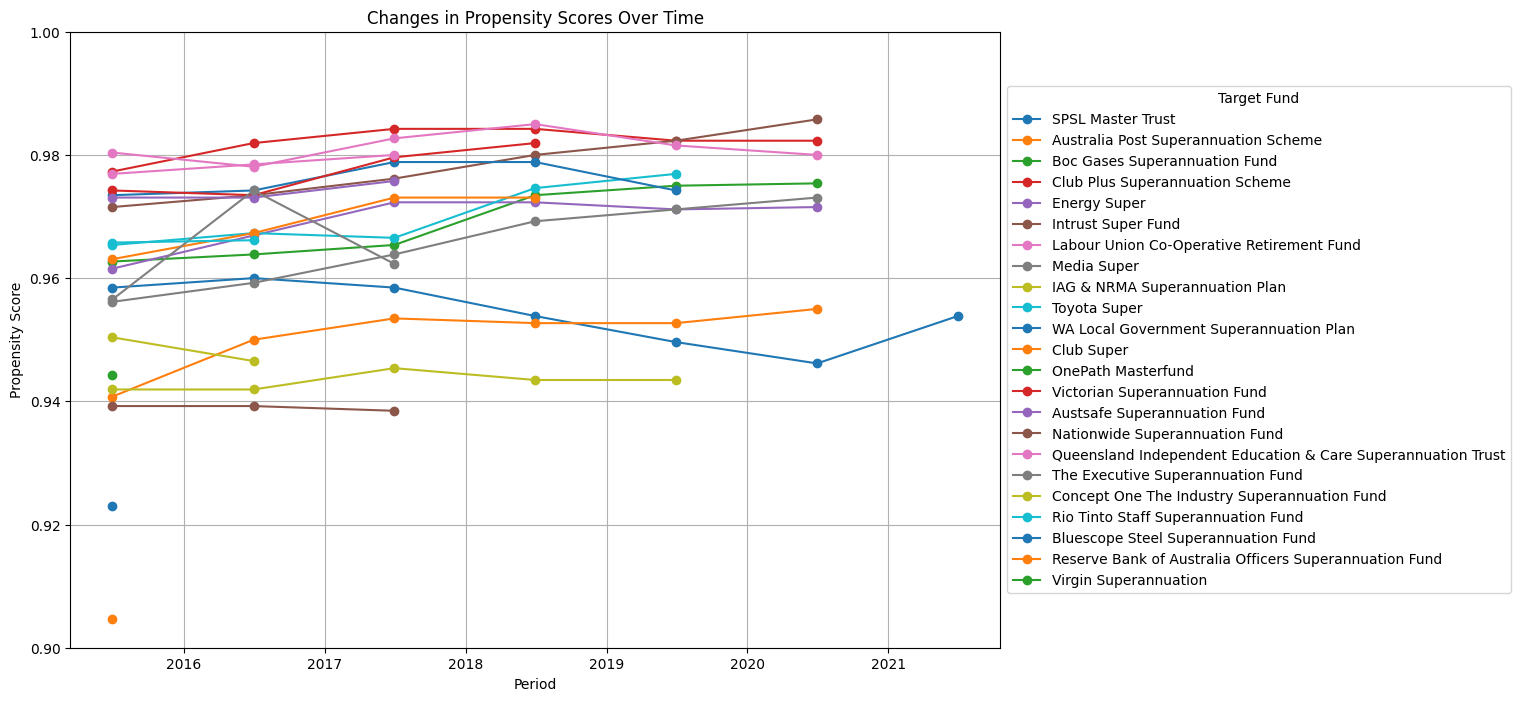

In [47]:
plt.figure(figsize=(12, 8))

for target_fund, row in merged_funds_df.iterrows():
    periods = list(row.index)
    propensity_scores = list(row)
    plt.plot(periods, propensity_scores, marker='o', label=target_fund)

plt.title("Changes in Propensity Scores Over Time")
plt.xlabel("Period")
plt.ylabel("Propensity Score")
plt.ylim([0.9, 1])  # Setting the range for the y-axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Target Fund")
plt.grid(True)
plt.show()


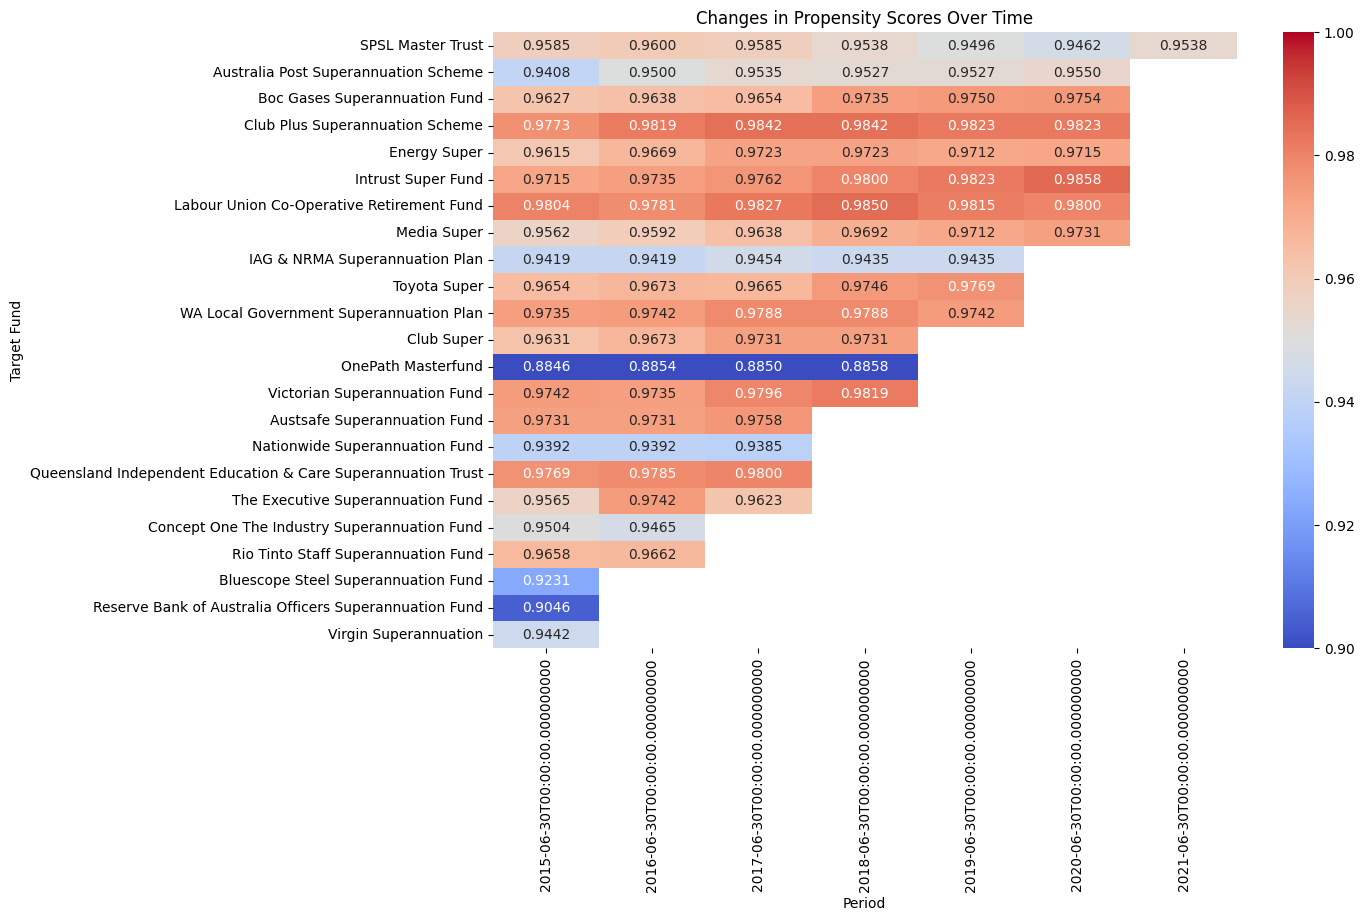

In [48]:
import seaborn as sns

plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(
    merged_funds_df, 
    annot=True,      # annotate each cell with the numeric value
    cmap='coolwarm', # color mapping
    vmin=0.9,        # set the minimum value for the color scale
    vmax=1 , 
    fmt='.4f'   
)

plt.title("Changes in Propensity Scores Over Time")
plt.xlabel("Period")
plt.ylabel("Target Fund")
plt.show()

## Propensity Scores - Merger Sample: Individual Metrics

#### % Members By Age Bracket

No acquirer found for target fund Quadrant Superannuation Scheme for the period just before the merger.


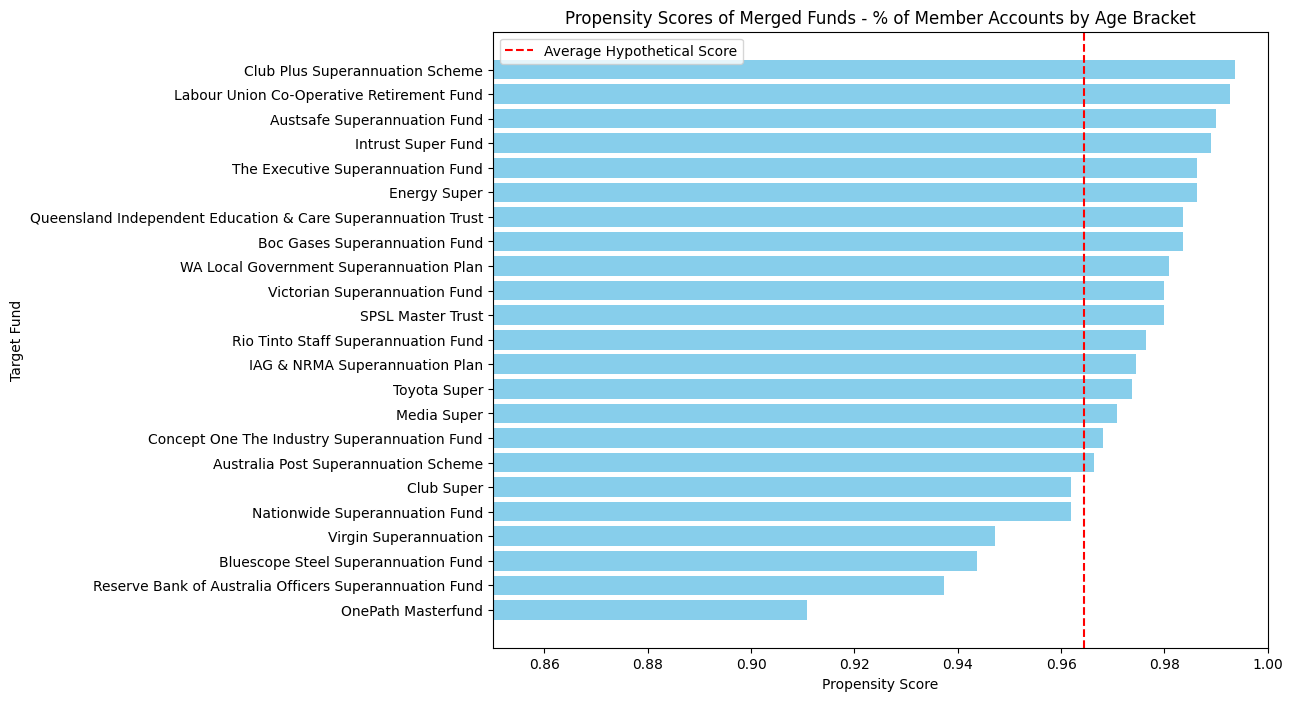

In [29]:
# Initialize an empty list to store the results
merged_funds_list = []

# Define the columns to consider
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%'
]

# Initialize an empty list to store the results
merged_funds_list = []
hypothetical_scores = []

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Store the information
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Calculate hypothetical propensity scores for every possible merger
for target, acquirer in combinations(final_df['Fund name'].unique(), 2):
    target_firm = final_df[final_df['Fund name'] == target].iloc[-1]
    acquirer_firm = final_df[final_df['Fund name'] == acquirer].iloc[-1]
    
    weighted_diff_sum = sum(abs(target_firm[col] - acquirer_firm[col]) for col in columns_to_consider)
    propensity_score = 1 - (weighted_diff_sum / len(columns_to_consider))
    hypothetical_scores.append(propensity_score)

# Calculate the average hypothetical propensity score
average_hypothetical_score = sum(hypothetical_scores) / len(hypothetical_scores)

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.axvline(x=average_hypothetical_score, color='red', linestyle='--', label='Average Hypothetical Score')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds - % of Member Accounts by Age Bracket')
plt.xlim(0.85, 1)  # Since propensity score is between 0 and 1
plt.legend()
plt.show()


In [49]:
# Initialize an empty list to store the results
merged_funds_list = []

# Define the columns to consider
columns_to_consider = [
    '<25%', '25 to 34%', '35 to 44%', '45 to 49%', '50 to 54%', '55 to 59%',
    '60 to 64%', '65 to 69%', '70 to 74%', '75 to 84%', '85+%'
]

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Print or store the information
        print(f"Target Fund: {row['Fund name']}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score:.3f}")
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)


Target Fund: SPSL Master Trust, Acquirer: LGIAsuper, Propensity Score: 0.980
Target Fund: Australia Post Superannuation Scheme, Acquirer: Australian Retirement Trust, Propensity Score: 0.966
Target Fund: Boc Gases Superannuation Fund, Acquirer: equipsuper, Propensity Score: 0.984
Target Fund: Club Plus Superannuation Scheme, Acquirer: AustralianSuper, Propensity Score: 0.994
Target Fund: Energy Super, Acquirer: LGIAsuper, Propensity Score: 0.986
Target Fund: Intrust Super Fund, Acquirer: HOSTPLUS Superannuation Fund, Propensity Score: 0.989
Target Fund: Labour Union Co-Operative Retirement Fund, Acquirer: AustralianSuper, Propensity Score: 0.993
Target Fund: Media Super, Acquirer: CONSTRUCTION AND BUILDING UNIONS SUPERANNUATION FUND, Propensity Score: 0.971
Target Fund: IAG & NRMA Superannuation Plan, Acquirer: Sunsuper Superannuation Fund, Propensity Score: 0.975
Target Fund: Toyota Super, Acquirer: equipsuper, Propensity Score: 0.974
Target Fund: WA Local Government Superannuation Pl

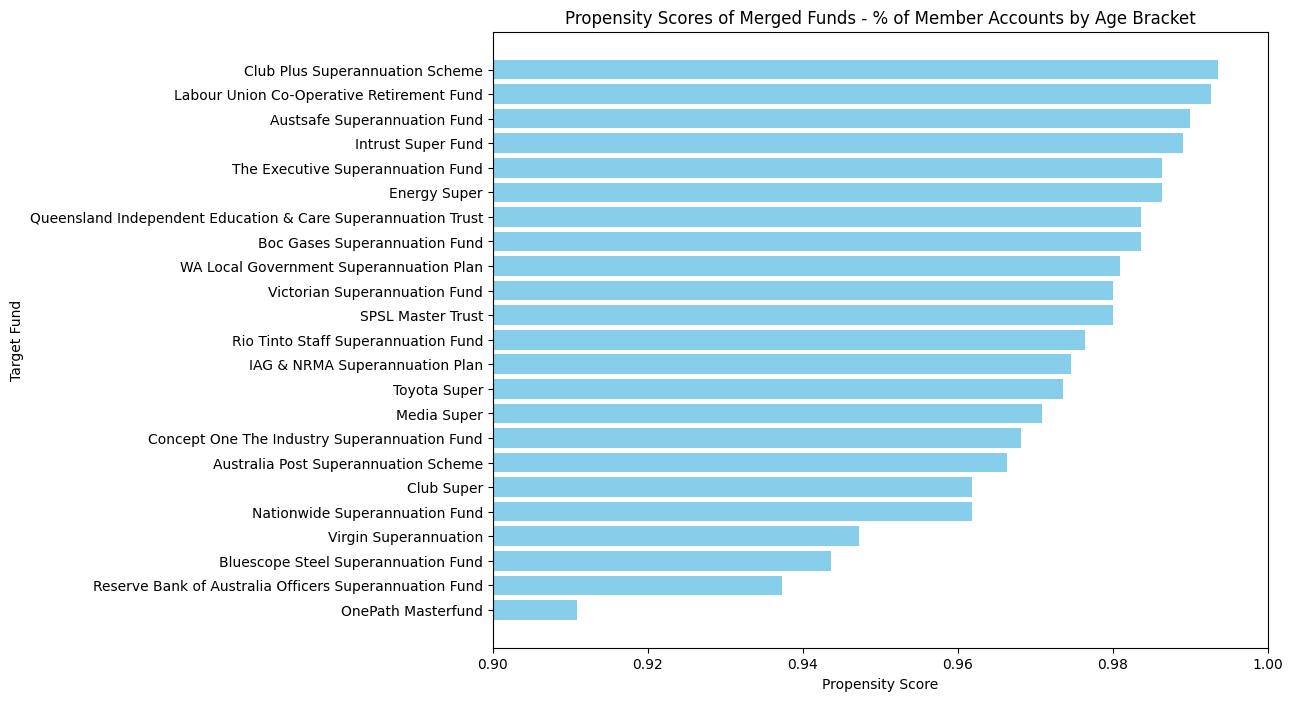

In [50]:
# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds - % of Member Accounts by Age Bracket')
plt.xlim(0.9, 1)  # Since propensity score is between 0 and 1
plt.show()

#### % of Member Accounts by Account Value

No acquirer found for target fund Quadrant Superannuation Scheme for the period just before the merger.


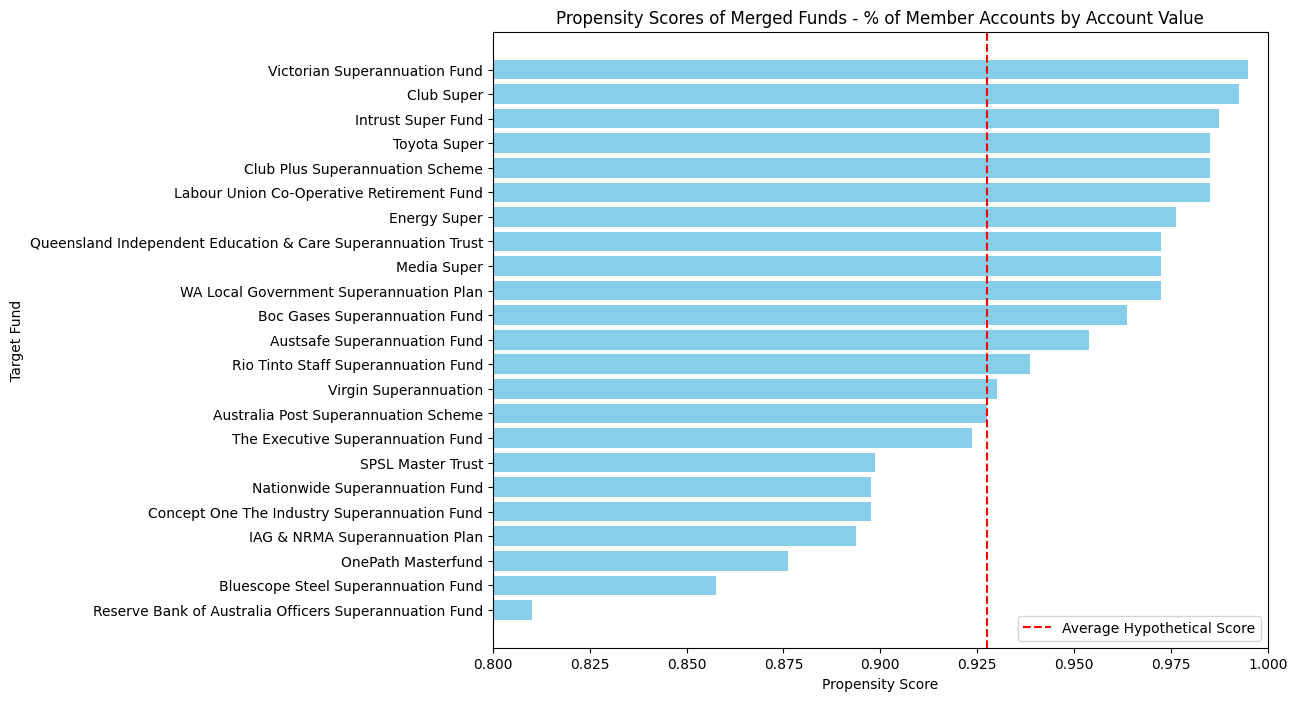

In [31]:
# Initialize an empty list to store the results
merged_funds_list = []

# Define the columns to consider
columns_to_consider = [
    '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%'
]

# Initialize an empty list to store the results
merged_funds_list = []
hypothetical_scores = []

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Store the information
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Calculate hypothetical propensity scores for every possible merger
for target, acquirer in combinations(final_df['Fund name'].unique(), 2):
    target_firm = final_df[final_df['Fund name'] == target].iloc[-1]
    acquirer_firm = final_df[final_df['Fund name'] == acquirer].iloc[-1]
    
    weighted_diff_sum = sum(abs(target_firm[col] - acquirer_firm[col]) for col in columns_to_consider)
    propensity_score = 1 - (weighted_diff_sum / len(columns_to_consider))
    hypothetical_scores.append(propensity_score)

# Calculate the average hypothetical propensity score
average_hypothetical_score = sum(hypothetical_scores) / len(hypothetical_scores)

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.axvline(x=average_hypothetical_score, color='red', linestyle='--', label='Average Hypothetical Score')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds - % of Member Accounts by Account Value')
plt.xlim(0.80, 1)  # Since propensity score is between 0 and 1
plt.legend()
plt.show()

In [51]:
# Initialize an empty list to store the results
merged_funds_list = []

# Define the columns to consider
columns_to_consider = [
    '<$1,000%',
    '$1,000 to $24,999%', '$25,000 to $49,000%', '$50,000 to $99,999%',
    '$100,000 to $199,999%', '$200,000 to $499,999%', '$500,000 to $999,999%',
    '$1,000,000+%'
]

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Print or store the information
        print(f"Target Fund: {row['Fund name']}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score:.3f}")
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

Target Fund: SPSL Master Trust, Acquirer: LGIAsuper, Propensity Score: 0.899
Target Fund: Australia Post Superannuation Scheme, Acquirer: Australian Retirement Trust, Propensity Score: 0.927
Target Fund: Boc Gases Superannuation Fund, Acquirer: equipsuper, Propensity Score: 0.964
Target Fund: Club Plus Superannuation Scheme, Acquirer: AustralianSuper, Propensity Score: 0.985
Target Fund: Energy Super, Acquirer: LGIAsuper, Propensity Score: 0.976
Target Fund: Intrust Super Fund, Acquirer: HOSTPLUS Superannuation Fund, Propensity Score: 0.988
Target Fund: Labour Union Co-Operative Retirement Fund, Acquirer: AustralianSuper, Propensity Score: 0.985
Target Fund: Media Super, Acquirer: CONSTRUCTION AND BUILDING UNIONS SUPERANNUATION FUND, Propensity Score: 0.973
Target Fund: IAG & NRMA Superannuation Plan, Acquirer: Sunsuper Superannuation Fund, Propensity Score: 0.894
Target Fund: Toyota Super, Acquirer: equipsuper, Propensity Score: 0.985
Target Fund: WA Local Government Superannuation Pl

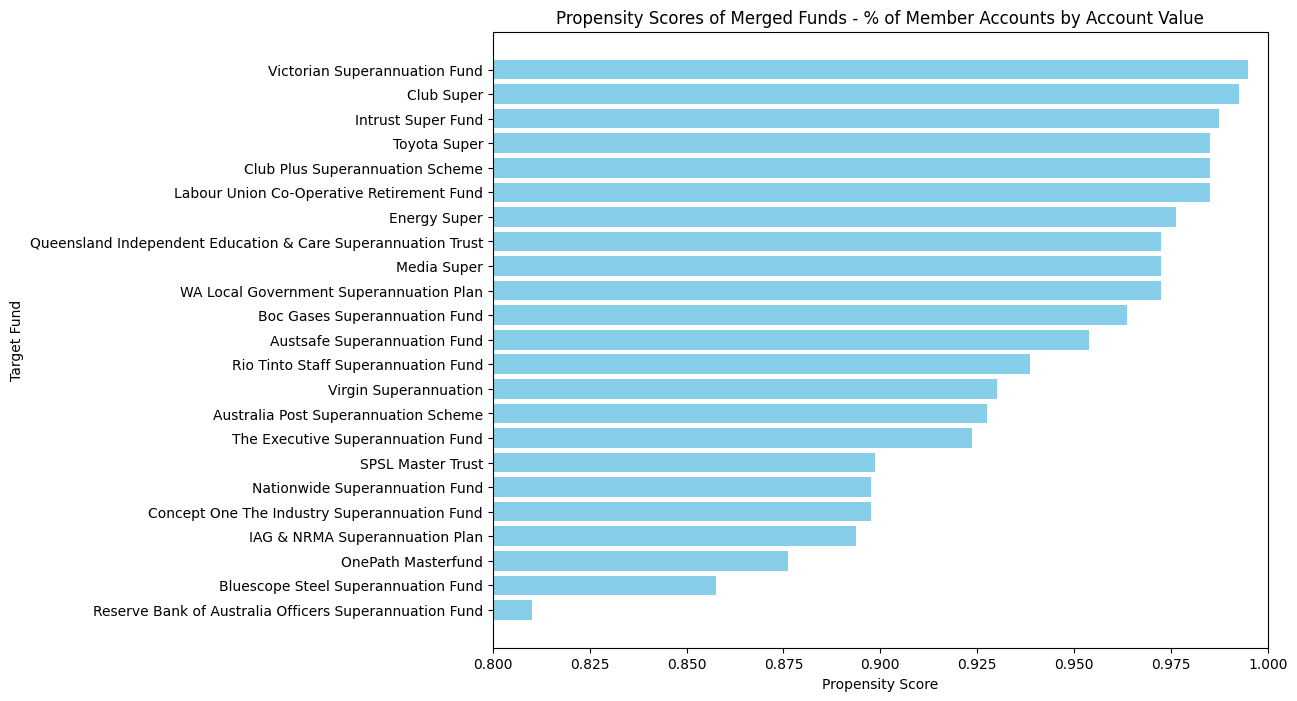

In [53]:
# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds - % of Member Accounts by Account Value')
plt.xlim(0.8, 1)  # Since propensity score is between 0 and 1
plt.show()

#### Propensity Score - Asset allocation

No acquirer found for target fund Quadrant Superannuation Scheme for the period just before the merger.


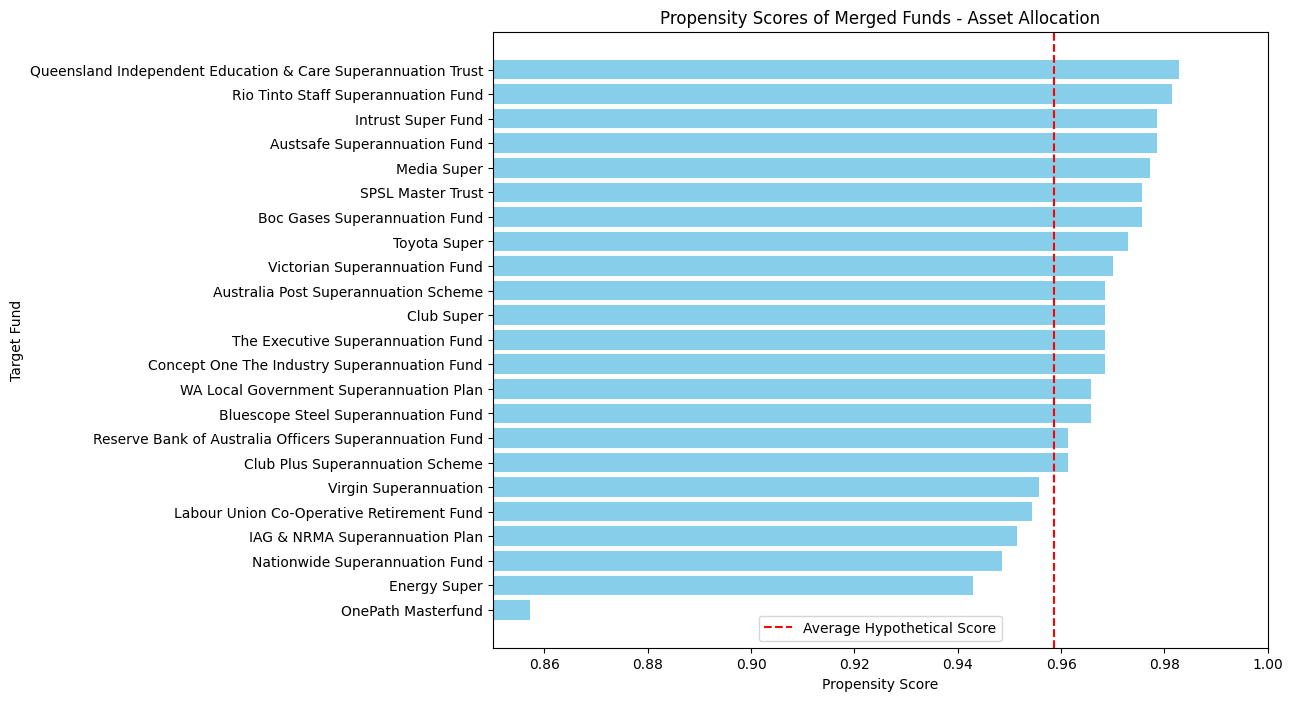

In [34]:
# Define the columns to consider
columns_to_consider = [
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

# Initialize an empty list to store the results
merged_funds_list = []

merged_funds_list = []
hypothetical_scores = []

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Store the information
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Calculate hypothetical propensity scores for every possible merger
for target, acquirer in combinations(final_df['Fund name'].unique(), 2):
    target_firm = final_df[final_df['Fund name'] == target].iloc[-1]
    acquirer_firm = final_df[final_df['Fund name'] == acquirer].iloc[-1]
    
    weighted_diff_sum = sum(abs(target_firm[col] - acquirer_firm[col]) for col in columns_to_consider)
    propensity_score = 1 - (weighted_diff_sum / len(columns_to_consider))
    hypothetical_scores.append(propensity_score)

# Calculate the average hypothetical propensity score
average_hypothetical_score = sum(hypothetical_scores) / len(hypothetical_scores)

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.axvline(x=average_hypothetical_score, color='red', linestyle='--', label='Average Hypothetical Score')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds - Asset Allocation')
plt.xlim(0.85, 1)  # Since propensity score is between 0 and 1
plt.legend()
plt.show()

In [54]:
# Initialize an empty list to store the results
merged_funds_list = []

# Define the columns to consider
columns_to_consider = [
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income', 'Proportion of investments in equity',
    'Proportion of investments in property', 'Proportion of investments in infrastructure',
    'Proportion of investments in commodities', 'Proportion of investments in other'
]

# Loop through each row in the DataFrame
for index, row in final_df.iterrows():
    if row['Merged'] == 1:
        target_firm = row
        acquirer_name = row['Acquirer']
        
        # Find the acquirer firm in the period just before the merger
        acquirer_firm_df = final_df[
            (final_df['Fund name'] == acquirer_name) & 
            (final_df['Period'] < target_firm['Period'])
        ].sort_values(by='Period')
        
        if acquirer_firm_df.empty:
            print(f"No acquirer found for target fund {row['Fund name']} for the period just before the merger.")
            continue
        
        acquirer_firm = acquirer_firm_df.iloc[-1]
        
        # Initialize variables to hold the weighted sum of differences and the sum of weights
        weighted_diff_sum = 0
        weight_sum = 0

        # Calculate the weighted sum of absolute differences
        for col in columns_to_consider:
            weight = 1  # You can change this if you want to give different weights to different metrics
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        # Calculate the propensity score
        propensity_score = 1 - (weighted_diff_sum / weight_sum)
        
        # Print or store the information
        print(f"Target Fund: {row['Fund name']}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score:.3f}")
        merged_funds_list.append({
            'Target Fund': row['Fund name'],
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

Target Fund: SPSL Master Trust, Acquirer: LGIAsuper, Propensity Score: 0.976
Target Fund: Australia Post Superannuation Scheme, Acquirer: Australian Retirement Trust, Propensity Score: 0.969
Target Fund: Boc Gases Superannuation Fund, Acquirer: equipsuper, Propensity Score: 0.976
Target Fund: Club Plus Superannuation Scheme, Acquirer: AustralianSuper, Propensity Score: 0.961
Target Fund: Energy Super, Acquirer: LGIAsuper, Propensity Score: 0.943
Target Fund: Intrust Super Fund, Acquirer: HOSTPLUS Superannuation Fund, Propensity Score: 0.979
Target Fund: Labour Union Co-Operative Retirement Fund, Acquirer: AustralianSuper, Propensity Score: 0.954
Target Fund: Media Super, Acquirer: CONSTRUCTION AND BUILDING UNIONS SUPERANNUATION FUND, Propensity Score: 0.977
Target Fund: IAG & NRMA Superannuation Plan, Acquirer: Sunsuper Superannuation Fund, Propensity Score: 0.951
Target Fund: Toyota Super, Acquirer: equipsuper, Propensity Score: 0.973
Target Fund: WA Local Government Superannuation Pl

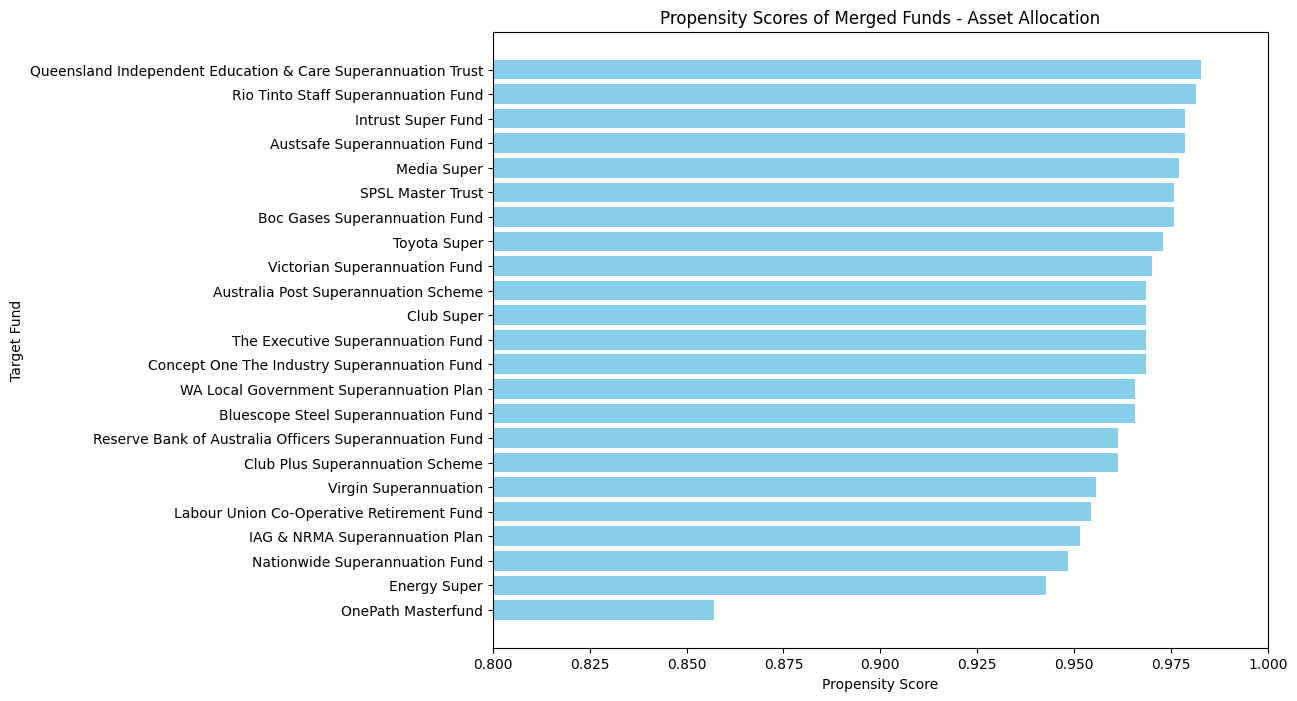

In [55]:
# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
merged_funds_df = pd.DataFrame(merged_funds_list)

# Sort the DataFrame by Propensity Score for better visualization
merged_funds_df = merged_funds_df.sort_values(by='Propensity Score')

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(merged_funds_df['Target Fund'], merged_funds_df['Propensity Score'], color='skyblue')
plt.xlabel('Propensity Score')
plt.ylabel('Target Fund')
plt.title('Propensity Scores of Merged Funds - Asset Allocation')
plt.xlim(0.8, 1)  # Since propensity score is between 0 and 1
plt.show()

In [36]:
column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

import random

# Initialize an empty list to store the results
random_funds_list = []

# Generate 100 random pairs of target and acquirer
unique_funds = final_df['Fund name'].unique()
random_pairs = [(random.choice(unique_funds), random.choice(unique_funds)) for _ in range(250)]

# Remove pairs where the target and acquirer are the same
random_pairs = [(target, acquirer) for target, acquirer in random_pairs if target != acquirer]

# Loop through each random pair
for target_name, acquirer_name in random_pairs:
    target_firm_df = final_df[
        (final_df['Fund name'] == target_name)
    ].sort_values(by='Period')

    acquirer_firm_df = final_df[
        (final_df['Fund name'] == acquirer_name)
    ].sort_values(by='Period')

    if target_firm_df.empty or acquirer_firm_df.empty:
        continue

    #target_firm = target_firm_df.iloc[-1]
    acquirer_firm = acquirer_firm_df.iloc[-1]

    # Initialize variables to hold the weighted sum of differences and the sum of weights
    weighted_diff_sum = 0
    weight_sum = 0

    # Calculate the weighted sum of absolute differences
    for col in columns_to_consider:
        weight = column_weights.get(col, 1)  # Get the weight from the dictionary, default to 1
        weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
        weight_sum += weight

    # Calculate the propensity score
    propensity_score = 1 - (weighted_diff_sum / weight_sum)

    # Print or store the information
    print(f"Target Fund: {target_name}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score:.4f}")
    random_funds_list.append({
        'Target Fund': target_name,
        'Acquirer': acquirer_name,
        'Propensity Score': propensity_score
    })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
random_funds_df = pd.DataFrame(random_funds_list)

# Print the mean and median propensity scores
print("\nMean Propensity Score:", random_funds_df['Propensity Score'].mean())
print("Median Propensity Score:", random_funds_df['Propensity Score'].median())

Target Fund: OnePath Masterfund, Acquirer: Bluescope Steel Superannuation Fund, Propensity Score: 0.9586
Target Fund: Club Super, Acquirer: Austsafe Superannuation Fund, Propensity Score: 0.9557
Target Fund: Bluescope Steel Superannuation Fund, Acquirer: Tasplan Superannuation Fund, Propensity Score: 0.9529
Target Fund: LGIAsuper, Acquirer: Bluescope Steel Superannuation Fund, Propensity Score: 0.9586
Target Fund: Mercer Super Trust, Acquirer: AustralianSuper, Propensity Score: 0.9471
Target Fund: Intrust Super Fund, Acquirer: Concept One The Industry Superannuation Fund, Propensity Score: 0.9486
Target Fund: Intrust Super Fund, Acquirer: Toyota Super, Propensity Score: 0.9371
Target Fund: Sunsuper Superannuation Fund, Acquirer: Concept One The Industry Superannuation Fund, Propensity Score: 0.9486
Target Fund: Virgin Superannuation, Acquirer: Australia Post Superannuation Scheme, Propensity Score: 0.9057
Target Fund: NGS Super, Acquirer: Retirement Portfolio Service, Propensity Score:

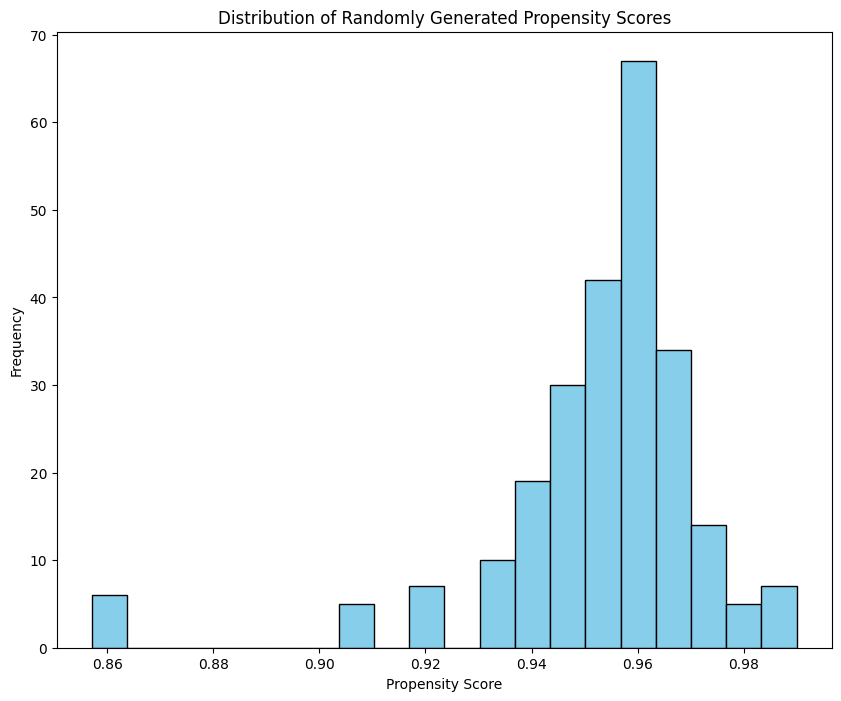

In [37]:
# Create the plot
plt.figure(figsize=(10, 8))
plt.hist(random_funds_df['Propensity Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Randomly Generated Propensity Scores')
plt.show()


#### Random Propensity Scores - Entire Dataset

In [41]:
column_weights = {
    '<25%': 1,
    '25 to 34%': 1,
    '35 to 44%': 1,
    '45 to 49%': 1,
    '50 to 54%': 1,
    '55 to 59%': 1,
    '60 to 64%': 1,
    '65 to 69%': 1,
    '70 to 74%': 1,
    '75 to 84%': 1,
    '85+%': 1,
    '<$1,000%': 1,
    '$1,000 to $24,999%': 1,
    '$25,000 to $49,000%': 1,
    '$50,000 to $99,999%': 1,
    '$100,000 to $199,999%': 1,
    '$200,000 to $499,999%': 1,
    '$500,000 to $999,999%': 1,
    '$1,000,000+%': 1,
    'Proportion of investments in cash': 1,
    'Proportion of investments in  fixed income': 1,
    'Proportion of investments in equity': 1,
    'Proportion of investments in property': 1,
    'Proportion of investments in infrastructure': 1,
    'Proportion of investments in commodities': 1,
    'Proportion of investments in other':1,
}

# Initialize an empty list to store the results
random_funds_list = []

# Generate 100 random pairs of target and acquirer
unique_funds = propensity['Fund name'].unique()
random_pairs = [(random.choice(unique_funds), random.choice(unique_funds)) for _ in range(250)]

# Remove pairs where the target and acquirer are the same
random_pairs = [(target, acquirer) for target, acquirer in random_pairs if target != acquirer]

# Loop through each random pair
for target_name, acquirer_name in random_pairs:
    target_firm_df = propensity[
        (propensity['Fund name'] == target_name)
    ].sort_values(by='Period')

    acquirer_firm_df = propensity[
        (propensity['Fund name'] == acquirer_name)
    ].sort_values(by='Period')

    if target_firm_df.empty or acquirer_firm_df.empty:
        continue

    #target_firm = target_firm_df.iloc[-1]
    acquirer_firm = acquirer_firm_df.iloc[-1]

    # Initialize variables to hold the weighted sum of differences and the sum of weights
    weighted_diff_sum = 0
    weight_sum = 0

    # Calculate the weighted sum of absolute differences
    for col in columns_to_consider:
        weight = column_weights.get(col, 1)  # Get the weight from the dictionary, default to 1
        weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
        weight_sum += weight

    # Calculate the propensity score
    propensity_score = 1 - (weighted_diff_sum / weight_sum)

    # Print or store the information
    print(f"Target Fund: {target_name}, Acquirer: {acquirer_name}, Propensity Score: {propensity_score:.4f}")
    random_funds_list.append({
        'Target Fund': target_name,
        'Acquirer': acquirer_name,
        'Propensity Score': propensity_score
    })

# Convert the list of dictionaries to a DataFrame for easier manipulation and visualization
random_funds_df = pd.DataFrame(random_funds_list)

# Print the mean and median propensity scores
print("\nMean Propensity Score:", random_funds_df['Propensity Score'].mean())
print("Median Propensity Score:", random_funds_df['Propensity Score'].median())

NameError: name 'random' is not defined

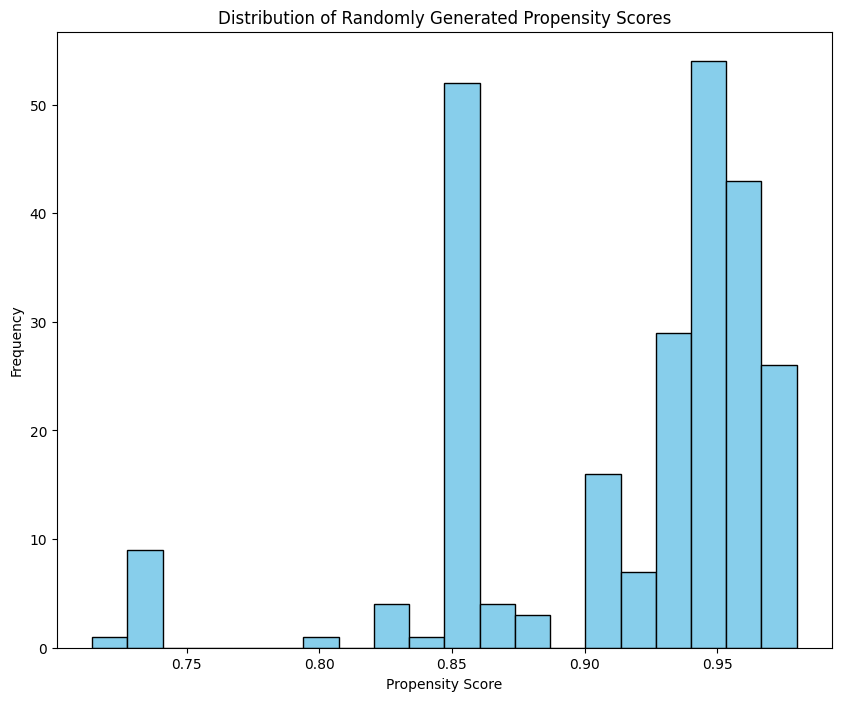

In [53]:
# Create the histogram plot
plt.figure(figsize=(10, 8))
plt.hist(random_funds_df['Propensity Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Randomly Generated Propensity Scores')
plt.show()

## Random Sampling - Merger vs Non-Merger Dataset

In [56]:
merged_df = pd.merge(propensity, Annual, on=['Period', 'Fund name', 'ABN'], how='inner', indicator=True)

# Now, filter out rows from 'propensity' that were present in 'merged_df'
non_merger_sample = propensity[~propensity.index.isin(merged_df.index)]

# Now, non_merger_sample will have all the rows from propensity except those matching with Annual on the specified columns.


In [62]:
columns_to_check = [
    'Proportion of investments in cash',
    #'Proportion of investments in fixed income',
    'Proportion of investments in equity',
    'Proportion of investments in property',
    'Proportion of investments in infrastructure',
    'Proportion of investments in commodities',
    'Proportion of investments in other'
]

# Filter rows based on the condition
non_merger_sample = non_merger_sample[non_merger_sample[columns_to_check].eq(0).sum(axis=1) <= 5]


In [63]:
final_df

,Period,Fund name,ABN,<25%,25 to 34%,35 to 44%,45 to 49%,50 to 54%,55 to 59%,60 to 64%,...,Proportion of investments in cash,Proportion of investments in fixed income,Proportion of investments in equity,Proportion of investments in property,Proportion of investments in infrastructure,Proportion of investments in commodities,Proportion of investments in other,Merger,Merged,Acquirer
0,2022-06-30,Australian Retirement Trust,60905115063,0.01,0.07,0.17,0.11,0.14,0.15,0.14,...,0.11,0.22,0.46,0.08,0.10,0.00,0.031,1,0,NaN
1,2022-06-30,AustralianSuper,65714394898,0.01,0.07,0.17,0.11,0.13,0.15,0.15,...,0.10,0.18,0.51,0.07,0.13,0.00,0.002,1,0,NaN
2,2022-06-30,Aware Super,53226460365,0.00,0.05,0.14,0.11,0.13,0.13,0.15,...,0.07,0.22,0.55,0.09,0.06,0.00,0.011,0,0,NaN
3,2022-06-30,CONSTRUCTION AND BUILDING UNIONS SUPERANNUATIO...,75493363262,0.01,0.10,0.21,0.13,0.15,0.15,0.13,...,0.02,0.22,0.50,0.14,0.13,0.00,0.002,1,0,NaN
4,2022-06-30,equipsuper,33813823017,0.00,0.03,0.12,0.09,0.13,0.17,0.18,...,0.11,0.16,0.57,0.08,0.07,0.00,0.011,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2015-06-30,The Executive Superannuation Fund,60998717367,0.01,0.14,0.28,0.12,0.13,0.12,0.09,...,0.16,0.17,0.59,0.07,0.00,0.00,0.011,0,0,NaN
247,2015-06-30,Toyota Super,58208377062,0.00,0.03,0.21,0.20,0.21,0.20,0.11,...,0.13,0.17,0.58,0.11,0.01,0.00,0.002,0,0,NaN
248,2015-06-30,Victorian Superannuation Fund,85977964496,0.00,0.09,0.20,0.10,0.11,0.14,0.17,...,0.14,0.14,0.64,0.04,0.04,0.00,0.002,0,0,NaN
249,2015-06-30,Virgin Superannuation,88436608094,0.01,0.21,0.41,0.15,0.10,0.07,0.03,...,0.08,0.15,0.66,0.11,0.00,0.00,0.002,0,0,NaN


In [71]:
unique_mysuper_name = final_df['Fund name'].nunique()
unique_mysuper_type = non_merger_sample['Fund name'].nunique()

print("Number of unique values in 'MySuper product name':", unique_mysuper_name)
print("Number of unique values in 'MySuper product type':", unique_mysuper_type)

Number of unique values in 'MySuper product name': 41
Number of unique values in 'MySuper product type': 208


In [64]:
non_merger_sample

4,Period,Fund name,ABN,<25%,25 to 34%,35 to 44%,45 to 49%,50 to 54%,55 to 59%,60 to 64%,...,"$200,000 to $499,999%","$500,000 to $999,999%","$1,000,000+%",Proportion of investments in cash,Proportion of investments in fixed income,Proportion of investments in equity,Proportion of investments in property,Proportion of investments in infrastructure,Proportion of investments in commodities,Proportion of investments in other
251,2021-06-30,The Victorian Independent Schools Superannuati...,37024873660,0.00,0.03,0.11,0.11,0.15,0.16,0.18,...,0.13,0.04,0.01,0.37,0.14,0.45,0.04,0.00,0.0,0.00
252,2021-06-30,Tidswell Master Superannuation Plan,34300938877,0.03,0.19,0.37,0.13,0.08,0.08,0.07,...,0.01,0.00,0.00,0.14,0.10,0.70,0.05,0.01,0.0,0.00
253,2021-06-30,TWU Superannuation Fund,77343563307,0.01,0.05,0.15,0.13,0.17,0.20,0.16,...,0.07,0.00,0.00,0.09,0.21,0.52,0.08,0.09,0.0,0.02
254,2021-06-30,Ultimate Superannuation Fund,97900294767,0.00,0.01,0.04,0.04,0.06,0.09,0.16,...,0.27,0.12,0.00,0.15,0.21,0.54,0.06,0.01,0.0,0.02
255,2021-06-30,Unisuper,91385943850,0.00,0.04,0.13,0.10,0.12,0.15,0.17,...,0.16,0.08,0.03,0.11,0.13,0.53,0.11,0.12,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2015-06-30,Wealth Personal Superannuation and Pension Fund,92381911598,0.02,0.03,0.07,0.06,0.08,0.14,0.22,...,0.13,0.04,0.01,0.20,0.17,0.53,0.06,0.01,0.0,0.02
1423,2015-06-30,Westpac Mastertrust - Superannuation Division,81236903448,0.02,0.16,0.25,0.13,0.14,0.12,0.08,...,0.01,0.00,0.00,0.09,0.18,0.57,0.07,0.00,0.0,0.10
1424,2015-06-30,Westpac Personal Superannuation Fund,36369876939,0.00,0.00,0.06,0.14,0.21,0.24,0.20,...,0.01,0.00,0.00,0.16,0.16,0.52,0.05,0.00,0.0,0.11
1425,2015-06-30,Worsley Alumina Superannuation Fund,51469547458,0.01,0.10,0.24,0.18,0.19,0.19,0.08,...,0.25,0.05,0.00,0.12,0.23,0.52,0.07,0.06,0.0,0.00


In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Function to compute propensity scores
def compute_propensity_scores(df, column_weights, columns_to_consider):
    random_funds_list = []
    unique_funds = df['Fund name'].unique()
    random_pairs = [(random.choice(unique_funds), random.choice(unique_funds)) for _ in range(250)]
    random_pairs = [(target, acquirer) for target, acquirer in random_pairs if target != acquirer]

    for target_name, acquirer_name in random_pairs:
        target_firm_df = df[df['Fund name'] == target_name].sort_values(by='Period')
        acquirer_firm_df = df[df['Fund name'] == acquirer_name].sort_values(by='Period')

        if target_firm_df.empty or acquirer_firm_df.empty:
            continue

        target_firm = target_firm_df.iloc[-1]
        acquirer_firm = acquirer_firm_df.iloc[-1]

        weighted_diff_sum = 0
        weight_sum = 0

        for col in columns_to_consider:
            weight = column_weights.get(col, 1)
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        propensity_score = 1 - (weighted_diff_sum / weight_sum)

        random_funds_list.append({
            'Target Fund': target_name,
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })
    
    return random_funds_list

# Define the columns to consider and weights
columns_to_consider = list(column_weights.keys())

merger_scores = []
non_merger_scores = []

# Run the function 100 times for both dataframes
for i in range(100):
    merger_scores.extend(compute_propensity_scores(final_df, column_weights, columns_to_consider))
    non_merger_scores.extend(compute_propensity_scores(non_merger_sample, column_weights, columns_to_consider))

# Convert lists to DataFrames
merger_df = pd.DataFrame(merger_scores)
non_merger_df = pd.DataFrame(non_merger_scores)

# Print means for clarity
print(f"Mean Propensity Score (Merger Sample): {merger_df['Propensity Score'].mean():.4f}")
print(f"Mean Propensity Score (Non-Merger Sample): {non_merger_df['Propensity Score'].mean():.4f}")

# Lists to store means of each sample set
merger_means = []
non_merger_means = []

# Calculate the mean for each set of 250 observations
for i in range(100):
    merger_sample = compute_propensity_scores(final_df, column_weights, columns_to_consider)
    Non_merger_sample = compute_propensity_scores(non_merger_sample, column_weights, columns_to_consider)
    
    merger_means.append(pd.DataFrame(merger_sample)['Propensity Score'].mean())
    non_merger_means.append(pd.DataFrame(Non_merger_sample)['Propensity Score'].mean())

# Plot histograms for distribution of Propensity Scores
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Propensity Scores
axes[0].hist(merger_df['Propensity Score'], bins=50, alpha=0.5, label='Merger Sample', color='blue')
axes[0].hist(non_merger_df['Propensity Score'], bins=50, alpha=0.5, label='Non-Merger Sample', color='green')
axes[0].set_title('Distribution of Propensity Scores')
axes[0].set_xlabel('Propensity Score')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper right')

# Mean Propensity Scores for each sample of 250 observations
axes[1].hist(merger_means, bins=20, alpha=0.5, label='Mean Propensity (Merger Sample)', color='blue')
axes[1].hist(non_merger_means, bins=20, alpha=0.5, label='Mean Propensity (Non-Merger Sample)', color='green')
#for mean in merger_means:
   # axes[1].axvline(mean, color='blue', linewidth=0.5, alpha=0.5)
#for mean in non_merger_means:
   # axes[1].axvline(mean, color='green', linewidth=0.5, alpha=0.5)
axes[1].set_title('Distribution of Mean Propensity Scores for Sample Sets')
axes[1].set_xlabel('Mean Propensity Score')
axes[1].set_ylabel('Frequency')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

NameError: name 'column_weights' is not defined

In [66]:
fig.savefig('Random Sampling Propensity.pdf', bbox_inches='tight')

In [65]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Function to compute propensity scores
def compute_propensity_scores(df, column_weights, columns_to_consider):
    random_funds_list = []
    unique_funds = df['Fund name'].unique()
    random_pairs = [(random.choice(unique_funds), random.choice(unique_funds)) for _ in range(250)]
    random_pairs = [(target, acquirer) for target, acquirer in random_pairs if target != acquirer]

    for target_name, acquirer_name in random_pairs:
        target_firm_df = df[df['Fund name'] == target_name].sort_values(by='Period')
        acquirer_firm_df = df[df['Fund name'] == acquirer_name].sort_values(by='Period')

        if target_firm_df.empty or acquirer_firm_df.empty:
            continue

        target_firm = target_firm_df.iloc[-1]
        acquirer_firm = acquirer_firm_df.iloc[-1]

        weighted_diff_sum = 0
        weight_sum = 0

        for col in columns_to_consider:
            weight = column_weights.get(col, 1)
            weighted_diff_sum += weight * abs(target_firm[col] - acquirer_firm[col])
            weight_sum += weight

        propensity_score = 1 - (weighted_diff_sum / weight_sum)

        random_funds_list.append({
            'Target Fund': target_name,
            'Acquirer': acquirer_name,
            'Propensity Score': propensity_score
        })
    
    return random_funds_list

# Define the columns to consider and weights
columns_to_consider = list(column_weights.keys())

merger_scores = []
non_merger_scores = []

# Run the function 100 times for both dataframes
for i in range(100):
    merger_scores.extend(compute_propensity_scores(final_df, column_weights, columns_to_consider))
    non_merger_scores.extend(compute_propensity_scores(non_merger_sample, column_weights, columns_to_consider))

# Convert lists to DataFrames
merger_df = pd.DataFrame(merger_scores)
non_merger_df = pd.DataFrame(non_merger_scores)

# Print means for clarity
print(f"Mean Propensity Score (Merger Sample): {merger_df['Propensity Score'].mean():.4f}")
print(f"Mean Propensity Score (Non-Merger Sample): {non_merger_df['Propensity Score'].mean():.4f}")

# Lists to store means of each sample set
merger_means = []
non_merger_means = []

# Calculate the mean for each set of 250 observations
for i in range(100):
    merger_sample = compute_propensity_scores(final_df, column_weights, columns_to_consider)
    Non_merger_sample = compute_propensity_scores(non_merger_sample, column_weights, columns_to_consider)
    
    merger_means.append(pd.DataFrame(merger_sample)['Propensity Score'].mean())
    non_merger_means.append(pd.DataFrame(Non_merger_sample)['Propensity Score'].mean())

# Plot histograms for distribution of Propensity Scores
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Propensity Scores
axes[0].hist(merger_df['Propensity Score'], bins=50, alpha=0.5, label='Merger Sample', color='blue')
axes[0].hist(non_merger_df['Propensity Score'], bins=50, alpha=0.5, label='Non-Merger Sample', color='green')
axes[0].set_title('Distribution of Propensity Scores')
axes[0].set_xlabel('Propensity Score')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper right')

# Mean Propensity Scores for each sample of 250 observations
axes[1].hist(merger_means, bins=20, alpha=0.5, label='Mean Propensity (Merger Sample)', color='blue')
axes[1].hist(non_merger_means, bins=20, alpha=0.5, label='Mean Propensity (Non-Merger Sample)', color='green')
#for mean in merger_means:
   # axes[1].axvline(mean, color='blue', linewidth=0.5, alpha=0.5)
#for mean in non_merger_means:
   # axes[1].axvline(mean, color='green', linewidth=0.5, alpha=0.5)
axes[1].set_title('Distribution of Mean Propensity Scores for Sample Sets')
axes[1].set_xlabel('Mean Propensity Score')
axes[1].set_ylabel('Frequency')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

TypeError: list indices must be integers or slices, not str

# Propensity Score Text

## Introduction

The Propensity Score Model aims to quantify the similarity between target and acquiring funds in terms of various characteristics. These characteristics include age distribution, balance distribution, and strategic asset allocation. The model is particularly useful for understanding how closely aligned the two funds are, which can be an essential factor in the success of a merger or acquisition.

## Methodology

The model uses a dataset that contains various attributes of different funds, including their name, period, and several metrics that represent the characteristics of the fund. The dataset also contains information on which funds have merged and who the acquirer was.

### Data Preprocessing

Before running the model, the data is preprocessed to replace any missing or undefined values with zeros. This ensures that the model does not run into errors during the calculation.

### Identifying Target and Acquirer

For each fund marked as a "target" (i.e., it has been acquired), the model identifies the corresponding "acquirer" fund. It then compares the characteristics of the target and acquirer in the period just before the merger.

### Calculating Propensity Score

The Propensity Score is calculated using a weighted average of the absolute differences between the target and acquirer for each metric considered. The formula for the propensity score \( P \) is given by:

\[
P = 1 - \frac{\sum_{i=1}^{n} w_i \times |x_{i, \text{target}} - x_{i, \text{acquirer}}|}{\sum_{i=1}^{n} w_i}
\]

Where:
- \( n \) is the number of metrics considered
- \( w_i \) is the weight given to the \( i^{th} \) metric
- \( x_{i, \text{target}} \) is the value of the \( i^{th} \) metric for the target fund
- \( x_{i, \text{acquirer}} \) is the value of the \( i^{th} \) metric for the acquirer fund

In this model, all weights \( w_i \) are set to 1 for simplicity, but they can be adjusted to give more importance to certain metrics.

## Output

The model outputs the Propensity Score for each target-acquirer pair, which is a value between 0 and 1. A score closer to 1 indicates that the target and acquirer are very similar in terms of the metrics considered, while a score closer to 0 indicates dissimilarity.

By examining these scores, stakeholders can gain insights into which mergers are most aligned and therefore more likely to be successful.

## Conclusion

The Propensity Score Model provides a quantitative way to evaluate the alignment between target and acquiring funds. This can be a valuable tool for decision-makers involved in mergers and acquisitions in the fund industry.


**TEXT FOR LATEX**

\documentclass{article}
\usepackage{amsmath}

\title{Propensity Score Model for Mergers and Acquisitions in Funds}
\author{}
\date{}

\begin{document}

\maketitle

\section{Introduction}

The Propensity Score Model aims to quantify the similarity between target and acquiring funds in terms of various characteristics. These characteristics include age distribution, balance distribution, and strategic asset allocation. The model is particularly useful for understanding how closely aligned the two funds are, which can be an essential factor in the success of a merger or acquisition.

\section{Methodology}

\subsection{Data Preprocessing}

Before running the model, the data is preprocessed to replace any missing or undefined values with zeros. This ensures that the model does not run into errors during the calculation.

\subsection{Identifying Target and Acquirer}

For each fund marked as a "target" (i.e., it has been acquired), the model identifies the corresponding "acquirer" fund. It then compares the characteristics of the target and acquirer in the period just before the merger.

\subsection{Calculating Propensity Score}

The Propensity Score is calculated using a weighted average of the absolute differences between the target and acquirer for each metric considered. The formula for the propensity score \( P \) is given by:

\[
P = 1 - \frac{\sum_{i=1}^{n} w_i \times \left| x_{i, \text{target}} - x_{i, \text{acquirer}} \right|}{\sum_{i=1}^{n} w_i}
\]

Where:
\begin{itemize}
    \item \( n \) is the number of metrics considered
    \item \( w_i \) is the weight given to the \( i^{th} \) metric
    \item \( x_{i, \text{target}} \) is the value of the \( i^{th} \) metric for the target fund
    \item \( x_{i, \text{acquirer}} \) is the value of the \( i^{th} \) metric for the acquirer fund
\end{itemize}

In this model, all weights \( w_i \) are set to 1 for simplicity, but they can be adjusted to give more importance to certain metrics.

\section{Output}

The model outputs the Propensity Score for each target-acquirer pair, which is a value between 0 and 1. A score closer to 1 indicates that the target and acquirer are very similar in terms of the metrics considered, while a score closer to 0 indicates dissimilarity.

\section{Conclusion}

The Propensity Score Model provides a quantitative way to evaluate the alignment between target and acquiring funds. This can be a valuable tool for decision-makers involved in mergers and acquisitions in the fund industry.

\end{document}
